In [2]:
import yt
from yt import YTArray
from astropy import constants as const
import sys
import h5py as h5
import trident
import numpy as np
import os.path
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import seaborn as sns
import palettable
sns.set_style("white",{'font.family':'serif', 'axes.grid': True})
#for trident: git checkout 8b71bb81879a4d86b6d6c5e83c10971ece4e5d96
#sys.path.append('../analysis')
#import spectrum_generating_tools as spg

In [3]:
ds = yt.load('/Users/irynabutsky/Work/galaxy/P0/P0.003195')
#trident.add_ion_fields(ds, ions = ['O VI', 'H I'])

# load in data of start and end coordinates of all the rays
ray_id, impact, bvx, bvy, bvz, xi, yi, zi, xf, yf, zf = np.loadtxt('../../data/P0_z0.25_ray_data.dat', skiprows = 1, unpack = True,\
                                                    usecols = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

# for annoying reasons... need to convert ray positions to "code units"
code_unit_conversion = ds.domain_right_edge.d / ds.domain_right_edge.in_units('kpc').d
start_pos = np.ndarray(shape=(0, 3))
end_pos = np.ndarray(shape=(0, 3))
for i in range(len(xi)):
    start_pos = np.vstack((start_pos, [xi[i], yi[i], zi[i]] * code_unit_conversion))
    end_pos = np.vstack((end_pos, [xf[i], yf[i], zf[i]] * code_unit_conversion))

ray_center = start_pos[10] + 0.5*(end_pos[10] - start_pos[10])
ray_direction = end_pos[10] - start_pos[10]
print(ray_center, ray_direction)

yt : [INFO     ] 2020-05-12 12:05:16,038 Parameters: current_time              = 3.398869692720506e+17 s
yt : [INFO     ] 2020-05-12 12:05:16,039 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-05-12 12:05:16,044 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-05-12 12:05:16,045 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-05-12 12:05:16,047 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2020-05-12 12:05:16,048 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2020-05-12 12:05:16,049 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2020-05-12 12:05:16,050 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2020-05-12 12:05:16,053 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-05-12 12:05:16,056 Parameters: hubble_constant           = 0.677583430663222


[-0.42299158 -0.30013312  0.13297239] [ 0.00847311 -0.00861534 -0.0031907 ]


In [88]:
def plot_sightline_data(ray_id):
    plot_data = h5.File('../../data/ray_files/ray_P0_3195_%i.h5'%(ray_id), 'r')

    # see all of the available arrays in the file
    # naming convention: O_p5_number_density = O VI number density

    # Position along the ray (along the y-axis). 0 = cluster center
    l = plot_data['l'].value
    temperature = plot_data['temperature'].value
    density     = plot_data['density'].value
    metallicity = plot_data['metallicity'].value
    vlos        = plot_data['velocity_los'].value
    # size of cell along sightline
    # need this to convert from ion number density to column density
    dl = plot_data['dl'].value
    
    # O VI and H I column densities
    ocol = dl * plot_data['O_p5_number_density'].value
    hcol = dl * plot_data['H_number_density'].value

    field_list = [temperature, density, metallicity, vlos, np.cumsum(hcol), np.cumsum(ocol)]
    ylim_list  = [(1e4, 1e7), (1e-30, 1e-23), (1e-4, 10), (-300, 300), (1e10, 1e20), (1e10, 1e16)]
    ylabel_list = ['Temperature (K)', 'Density (g cm$^{-3}$)', 'Metallicity ($Z_{\odot}$)', 
                    'LOS Velocity (km/s)', 'H I Column Density (cm$^{-2}$)', 'O VI Column Density (cm$^{-2}$)']
    
    fig, ax = plt.subplots(nrows = len(field_list), ncols = 1 , figsize = (6, len(field_list)*3),
                               sharex=True, sharey=False)
    for i in range(len(field_list)):
        if i > 3:
            label = 'Cumulative Column Density'
        else:
            label = None
        ax[i].scatter(l, field_list[i], label = label)
        if i != 3:
            ax[i].set_yscale('log')            
        ax[i].set_xlim(0, 500)
        ax[i].set_ylim(ylim_list[i])
        ax[i].set_ylabel(ylabel_list[i])
        
    ax[4].scatter(l, hcol, label = 'Local Column Density')
    ax[5].scatter(l, ocol, label = 'Local Column Density')
    ax[len(field_list)-1].set_xlabel
    ax[0].set_xlabel('Lightray Trajectory (kpc)')
    ax[len(field_list)-1].legend()
    fig.tight_layout()
    plt.show()
    plt.savefig('../../plots/P0_z0.25_sightline_%i_multipanel.png'%(output, ray_id))


/Users/irynabutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/Users/irynabutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':
/Users/irynabutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/irynabutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/irynabutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] =

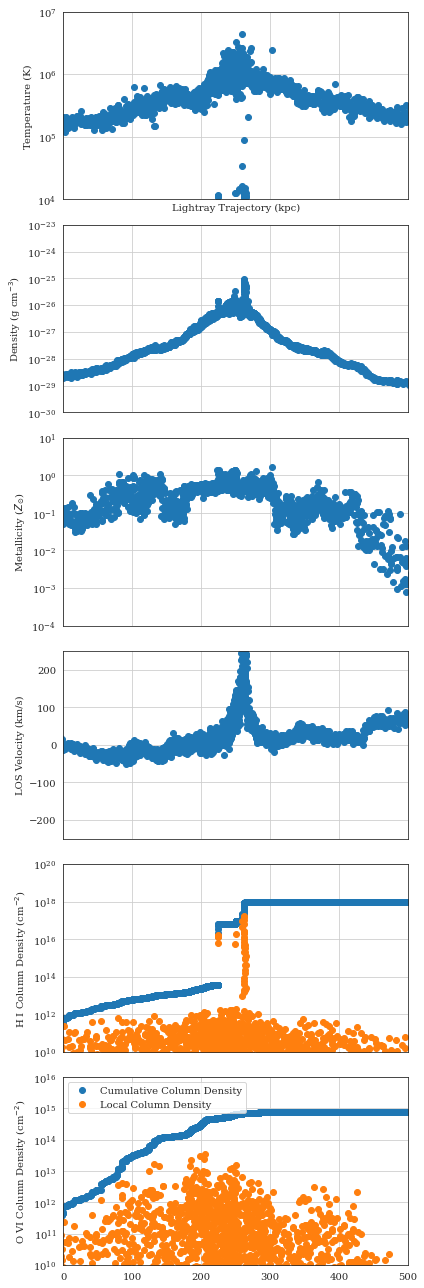

In [89]:
plot_sightline_data(10)

In [148]:
def _los_vel(field, data):
    if data.has_field_parameter("bulk_velocity"):
        bv = data.get_field_parameter("bulk_velocity").in_units("km/s")
        print("heh", bv)
        sys.stdout.flush()
    else:
        print('wah')
        bv = data.ds.arr(np.zeros(3), "cm/s")
    vx = np.array((data[('gas', 'velocity_x')] - bv[0]).in_units('km/s'))
    vy = np.array((data[('gas', 'velocity_y')] - bv[1]).in_units('km/s'))
    vz = np.array((data[('gas', 'velocity_z')] - bv[2]).in_units('km/s'))
    
   # vel = np.column_stack((vx, vy, vz))
    if data.has_field_parameter("normal"):
        r_hat = data.get_field_parameter("normal")
        print("normal vector = ", r_hat)
    else:
        ('warning: no ray_norm')
        r_hat = [0, 0, 1]
        
    r_hat_mag = np.linalg.norm(r_hat)
    r_hat = np.divide(r_hat, r_hat_mag)
    
   # v_dot_rhat = np.dot(vel, r_hat) 
    v_dot_rhat = vx*r_hat[0] + vy*r_hat[1] + vz*r_hat[2]
    print(v_dot_rhat.shape)
    return YTArray(v_dot_rhat, 'km/s')

In [146]:
#ds = yt.load('/Users/irynabutsky/Work/galaxy/P0/P0.003195')
from yt.fields.api import ValidateParameter

#yt.add_field(('Gas', 'ray_los_velocity'), function = _los_vel, particle_type = True,
#             force_override = True, units = 'km/s', validators=[ValidateParameter(['normal', 'bulk_velocity'])])

In [159]:
ds = yt.load('/Users/irynabutsky/Work/galaxy/P0/P0.003195')
ad = ds.all_data()
ad.set_field_parameter('bulk_velocity', YTArray([0, 0, 100], 'km/s'))
ad.set_field_parameter('normal', [0, 0, 1])
ds.add_field(('all', 'ray_los_velocity2'), function = _los_vel, particle_type = True,
             force_override = True, units = 'km/s', validators=[ValidateParameter(['normal', 'bulk_velocity'])])

code_unit_conversion = ds.domain_right_edge.d / ds.domain_right_edge.in_units('kpc').d

width = np.array([200., 10., 10.]) # kpc
width *= code_unit_conversion
print(width)
#image_test_bv_z = yt.off_axis_projection(ds, ray_center, ray_direction, width, 
#                                   [600, 30], ('all', 'ray_los_velocity2'),
#                               weight = ('gas', 'density'))
image_bv_z = yt.off_axis_projection(ds, ray_center, ray_direction, width, 
                                  [1200, 60], ('gas', 'velocity_z'),
                               weight = ('gas', 'density'))


yt : [INFO     ] 2020-05-11 18:02:41,046 Parameters: current_time              = 3.398869692720506e+17 s
yt : [INFO     ] 2020-05-11 18:02:41,046 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-05-11 18:02:41,047 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-05-11 18:02:41,049 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-05-11 18:02:41,051 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2020-05-11 18:02:41,053 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2020-05-11 18:02:41,056 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2020-05-11 18:02:41,057 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2020-05-11 18:02:41,059 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-05-11 18:02:41,059 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2020-05-11 18:02:41,069 Allocating for 1.447e+06 pa

heh [9.09256855e-08 6.58488253e-08 7.73555096e-08] km/s
normal vector =  [0.00980405 0.00639481 0.00227421] dimensionless
(16, 16, 16)
heh [9.83968060e-08 7.30475512e-08 5.84509110e-08] km/s
[0.00983968 0.00730476 0.00584509] cm/s
(16, 16, 16)
heh [4.91739823e-08 5.34785639e-08 2.21273886e-08] km/s
[0.0049174  0.00534786 0.00221274] cm/s
(16, 16, 16)
heh [8.45747196e-08 3.20991573e-08 7.51387749e-08] km/s
normal vector =  [0.00899098 0.00168123 0.0097542 ] dimensionless
(16, 16, 16)
heh [9.09062997e-08 8.77239104e-08 1.49093597e-09] km/s
normal vector =  [0.00818652 0.00112674 0.00222525] dimensionless
(16, 16, 16)
[0.00499918 0.00024996 0.00024996]
heh [4.97215376e-09 1.05491812e-08 2.89484366e-08] km/s
normal vector =  [0.00023661 0.0092289  0.00409237] dimensionless
(16, 16, 16)
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0. 0. 0.] km/s
heh [0.

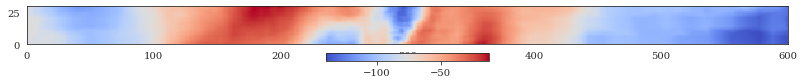

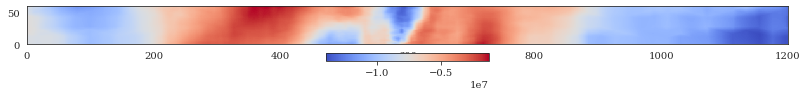

In [162]:
fig, ax = plt.subplots(1, 1, figsize = (20, 1))
im = ax.pcolormesh(image_test_bv_z.T, cmap = 'coolwarm')#, vmin = -200, vmax = 200)
cbar = fig.colorbar(im, ax=ax, orientation = 'horizontal')

ax.set_aspect('equal')

fig, ax = plt.subplots(1, 1, figsize = (20, 1))
im = ax.pcolormesh(image_vz.T, cmap = 'coolwarm')
cbar = fig.colorbar(im, ax=ax, orientation = 'horizontal')

ax.set_aspect('equal')

In [136]:
ad.field_parameters

{'center': YTArray([0., 0., 0.]) code_length,
 'bulk_velocity': [1, 1, 1],
 'bulk_magnetic_field': YTArray([0., 0., 0.]) G,
 'normal': YTArray([0., 0., 1.]) (dimensionless),
 'norm': [1, 0, 0]}

In [89]:
r_hat = np.array([1, 0, 1])
vx = np.array([1, 2, 3, 4])
vy = np.array([5, 6, 7, 8])
vz = np.array([9, 10, 11, 12])

vel = np.column_stack((vx, vy, vz))

v_dot_rhat = vx*r_hat[0] + vy*r_hat[1] + vz*r_hat[2]
vx *= r_hat[0]
vy *= r_hat[1]
vz *= r_hat[2]

print(len(vx), len(vy), len(vz))
#vel = np.column_stack((vx, vy, vz)
                      
v_dot_rhat = np.dot(vel, r_hat)
print((vel.shape))
print(v_dot_rhat)



4 4 4
(4, 3)
[10 12 14 16]


In [47]:
#ad = ds.all_data()
ds.add_field(('all', 'ray_los_velocity'), function = _los_vel4, particle_type = True,
             force_override = True, units = 'km/s')

wah
1.0
[0. 0. 1.] 1.0


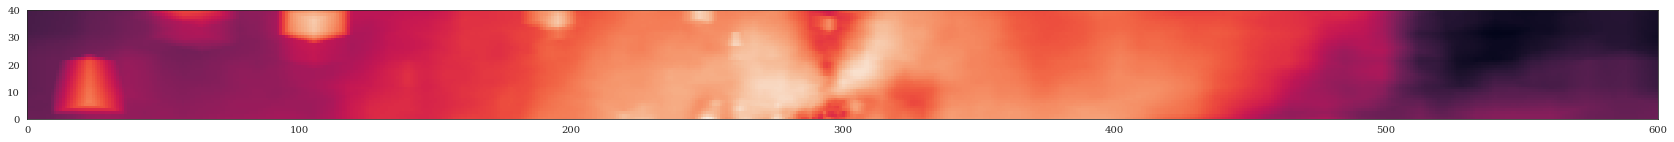

In [58]:
fig, ax = plt.subplots(1, 1, figsize = (30, 2))
ax.pcolormesh(image2.T, norm = LogNorm())
ax.set_aspect('equal')

yt : [INFO     ] 2020-04-28 15:44:56,005 xlim = -0.006249 0.006249
yt : [INFO     ] 2020-04-28 15:44:56,006 ylim = -0.000250 0.000250
yt : [INFO     ] 2020-04-28 15:44:56,007 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



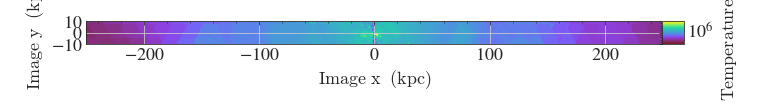

In [21]:
s = yt.OffAxisSlicePlot(ds, [1, 1, 1], ('gas', 'temperature'), center = gcenter, width = ((300, 'kpc'), (20, 'kpc')))
s.show()

In [208]:
import palettable
def get_cmap(field):
    if field =='density':
        cmap = palettable.cmocean.sequential.Tempo_20.mpl_colormap
    elif field == 'pressure':
        cmap = 'magma'
    elif field == 'temperature':
        cmap = palettable.scientific.sequential.LaJolla_20_r.mpl_colormap
    elif field == 'cr_eta':
        cmap = palettable.scientific.sequential.Tokyo_20.mpl_colormap
    elif field == 'cr_pressure':
        cmap = palettable.scientific.sequential.Turku_20.mpl_colormap
    elif field == 'velocity_magnitude' or field == 'velocity_los':
        cmap = palettable.scientific.diverging.Vik_20.mpl_colormap
    elif field == 'magnetic_field_strength':
        cmap = palettable.scientific.sequential.LaPaz_20.mpl_colormap
    elif field == 'H_p0_number_density':
        cmap = 'purple_mm'
    elif field == 'O_p5_number_density':
        cmap = 'dusk'
    elif field == 'metallicity':
        cmap = 'gist_earth'
    else:
        cmap = 'viridis'
        print(field, ' not mapped')
    return cmap

In [1]:
ray_id = 0
f = h5.File('../../data/ray_files/ray_image_data_P0_3195_%i.h5'%ray_id, 'r')
print(list(f.keys()))
params = {"xtick.color" : "white", 
          "ytick.color" : "white"} 
plt.rcParams.update(params)
field_list = ['temperature', 'density', 'metallicity', 'velocity_los', 
              'O_p5_number_density', 'Si_p2_number_density', 'H_p0_number_density']
zlim_list  = [(8e4, 1.5e6), (3e-29, 3e-26), (3e-3, 1), (-200, 200), (8e12, 3e16),
              (8e12, 1e15), (8e12, 1e17)]
ylabel_list = ['Temperature (K)', 'Density (g cm$^{-3}$)', 'Metallicity ($Z_{\odot}$)', 
                    'LOS Velocity (km/s)', 'O VI Column Density (cm$^{-2}$)',
                   'Si III Column Density (cm$^{-2}$)', 'H I Column Density (cm$^{-2}$)']

fig, ax = plt.subplots(nrows = 7, ncols =1, figsize = (15, 8))
for i, field in enumerate(field_list):
    if field == 'velocity_los':
        vx = f['velocity_x'].value / 1e5
        vy = f['velocity_y'].value / 1e5
        vz = f['velocity_z'].value / 1e5
        ray_direction = end_pos[ray_id] - start_pos[ray_id]
        image = los_vel(vx, vy, vz, bv = [bvx[0], bvy[0], bvz[0]], normal = ray_direction)
        norm = None
    else:
        image = f[field].value
        norm = LogNorm()
    if field == 'metallicity':
        image *= 77.22007722007721  # converting from code units to zsun

    im = ax[i].pcolormesh(image.T, norm = norm, cmap = get_cmap(field),
                          vmin = zlim_list[i][0], vmax = zlim_list[i][1])
    ax[i].axhline(40, linewidth = 1, color = 'white', linestyle = 'dashed')
    cbax = inset_axes(ax[i], width = "30%", height = "13%", loc = 6)
    cbar = fig.colorbar(im, cax=cbax, orientation = 'horizontal')
    cbar.set_label(ylabel_list[i], color = 'white')
#    cbar = plt.colorbar(im, ax = ax[i], label = ylabel_list[i], pad = 0)
    
#    if i < len(field_list) -1:
#        ax[i].set_xticks([])
#    ax[i].set_yticks([])
    

#ax[-1].set_xlabel('Lightray Trajectory')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.savefig('../../plots/sightline/ray_P0_3195_%i.png'%ray_id, dpi = 300)

NameError: name 'h5' is not defined

In [166]:
f = h5.File('../../data/ray_files/ray_image_data_P0_3195_0.h5', 'r')
vx = f['velocity_x'].value / 1e5
vy = f['velocity_y'].value / 1e5
vz = f['velocity_z'].value / 1e5

/Users/irynabutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/Users/irynabutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irynabutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


In [223]:
f.close()

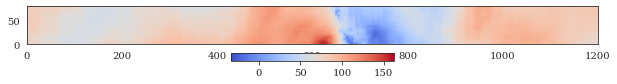

In [167]:
fig, ax = plt.subplots(1, 1, figsize = (20, 1))
im = ax.pcolormesh(vx.T, cmap = 'coolwarm')#, vmin = -200, vmax = 200)
cbar = fig.colorbar(im, ax=ax, orientation = 'horizontal')
ax.set_aspect('equal')
                        

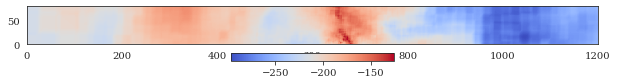

In [168]:
fig, ax = plt.subplots(1, 1, figsize = (20, 1))
im = ax.pcolormesh(vy.T, cmap = 'coolwarm')#, vmin = -200, vmax = 200)
cbar = fig.colorbar(im, ax=ax, orientation = 'horizontal')
ax.set_aspect('equal')

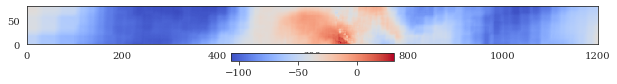

In [169]:
fig, ax = plt.subplots(1, 1, figsize = (20, 1))
im = ax.pcolormesh(vz.T, cmap = 'coolwarm')#, vmin = -200, vmax = 200)
cbar = fig.colorbar(im, ax=ax, orientation = 'horizontal')
ax.set_aspect('equal')

In [200]:
def los_vel(vx, vy, vz, bv = [0, 0, 0], normal = [0, 0, 1]):
    vx = np.array(vx - bv[0])
    vy = np.array(vy - bv[1])
    vz = np.array(vz - bv[2])
    #vel = np.column_stack((vx, vy, vz))

    normal_mag = np.linalg.norm(normal)
    normal = np.divide(normal, normal_mag)
    #normal = np.column_stack(normal)
    
    #print(vel.shape, normal.shape)
    #v_dot_norm = np.dot(vel, normal) 
    v_dot_norm = vx*normal[0] + vy*normal[1] + vz*normal[2]
   # print(v_dot_rhat.shape)
    return v_dot_norm

In [201]:
vlos = los_vel(vx, vy, vz)

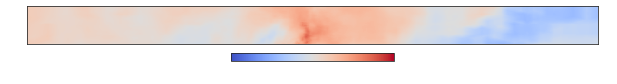

In [217]:
vlos = los_vel(vx, vy, vz, bv = bulk_vel, normal = [0, 1, 0])
fig, ax = plt.subplots(1, 1, figsize = (20, 1))
im = ax.pcolormesh(vlos.T, cmap = 'coolwarm', vmin = -200, vmax = 200)
cbar = fig.colorbar(im, ax=ax, orientation = 'horizontal')
ax.set_aspect('equal')

In [213]:
bulk_vel = [bvx[0], bvy[0], bvz[0]]
ray_direction = 

In [216]:
vlos

array([[ 38.95787812,  38.96625547,  38.97463654, ...,  39.10645233,
         39.15743604,  39.22109832],
       [ 38.95291496,  38.97213515,  38.99132783, ...,  38.8943911 ,
         38.94044242,  38.98643225],
       [ 38.97610282,  38.99520339,  39.01427675, ...,  38.68552713,
         38.73137002,  38.77745914],
       ...,
       [-20.30506353, -20.29991734, -20.29477738, ..., -72.73429266,
        -72.68482199, -72.63510728],
       [-20.03891574, -20.03388627, -20.02886295, ..., -73.57901389,
        -73.5310982 , -73.48294353],
       [-19.76798061, -19.76307291, -19.75817126, ..., -74.4425554 ,
        -74.39627678, -74.34976474]])

In [175]:
vx

array([[75.6361317 , 75.60675231, 75.57735365, ..., 80.59194813,
        80.59257946, 80.59321044],
       [75.61201561, 75.5826204 , 75.5532059 , ..., 80.59246642,
        80.59309746, 80.59372814],
       [75.58788654, 75.55847549, 75.52904514, ..., 80.59298446,
        80.59361521, 80.5942456 ],
       ...,
       [70.96639312, 71.13433814, 71.30871646, ..., 86.31462197,
        86.19187962, 86.17140468],
       [70.81616071, 70.98467994, 71.18237746, ..., 86.25917934,
        86.1426337 , 86.12196058],
       [70.73253518, 70.92350421, 71.12185356, ..., 86.02076825,
        85.91018254, 85.88916737]])